In [1]:
import pandas as pd
import os
from enum import Enum
from typing import List

class MovieDataLoader:
    def __init__(self, file_path: str):
        self.file_path = file_path
        self.extension = os.path.splitext(file_path)[1]
        self.dataframe = None

    def load(self) -> pd.DataFrame:
        self.dataframe = pd.read_csv(
            self.file_path,
            sep='\t' if self.extension == '.txt' else ','
        )
        return self.dataframe

class DB(Enum):
    CASTINGS = 0
    COUNTRIES = 1
    GENRES = 2
    RATES = 3
    MOVIES = 4
    PEOPLES = 5

def get_dataframes() -> List[pd.DataFrame]:
    base_path = os.path.join(
        os.getcwd(),
        "data/kmrd/kmr_dataset/datafile/kmrd-small"
    )
    db_name = ["castings.csv", "countries.csv", "genres.csv", "rates.csv", "movies.txt", "peoples.txt"]
    db_paths = [os.path.join(base_path, name) for name in db_name]
    return [MovieDataLoader(path).load() for path in db_paths]

In [1]:
dataframes = get_dataframes()
castings_df = dataframes[DB.CASTINGS.value]
countries_df = dataframes[DB.COUNTRIES.value]
genres_df = dataframes[DB.GENRES.value]
rates_df = dataframes[DB.RATES.value]
movies_df = dataframes[DB.MOVIES.value]
peoples_df = dataframes[DB.PEOPLES.value]

print(castings_df.head())
print(countries_df.head())
print(genres_df.head())

NameError: name 'get_dataframes' is not defined

In [ ]:
print(rates_df.head())
print(movies_df.head())
print(peoples_df.head())

In [3]:
# 결측치 확인
def print_missing_values():
    print("결측치 확인:")
    print(movies_df.isnull().sum())
    print(castings_df.isnull().sum())
    print(countries_df.isnull().sum())
    print(genres_df.isnull().sum())
    print(rates_df.isnull().sum())

def remove_missing_values():
    movies_df['year'] = pd.to_numeric(movies_df['year'], errors='coerce')
    movies_df['grade'] = pd.to_numeric(movies_df['grade'], errors='coerce')

    year_median = movies_df['year'].median() if not movies_df['year'].isna().all() else 0
    grade_median = movies_df['grade'].median() if not movies_df['grade'].isna().all() else 0

    # Fill missing values
    movies_df.fillna({
        'title': 'Unknown',
        'title_eng': 'Unknown',
        'year': year_median,
        'grade': grade_median
    }, inplace=True)

    peoples_df.fillna({
        'original': 'Unknown'
    }, inplace=True)

print_missing_values()

결측치 확인:
movie          0
title          7
title_eng      8
year         390
grade         42
dtype: int64
movie      0
people     0
order      0
leading    0
dtype: int64
movie      0
country    0
dtype: int64
movie    0
genre    0
dtype: int64
user     0
movie    0
rate     0
time     0
dtype: int64


In [4]:
remove_missing_values()
print_missing_values()

결측치 확인:
movie        0
title        0
title_eng    0
year         0
grade        0
dtype: int64
movie      0
people     0
order      0
leading    0
dtype: int64
movie      0
country    0
dtype: int64
movie    0
genre    0
dtype: int64
user     0
movie    0
rate     0
time     0
dtype: int64


In [6]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# D2Coding 폰트 경로 설정
font_path = "../D2Coding.ttf"
fontprop = fm.FontProperties(fname=font_path)

# 폰트 설정
plt.rc("font", family=fontprop.get_name())
plt.rcParams.update({"font.size": 14})  # Set the font size to 14
plt.figure(figsize=(19, 10))


<Figure size 1900x1000 with 0 Axes>

<Figure size 1900x1000 with 0 Axes>

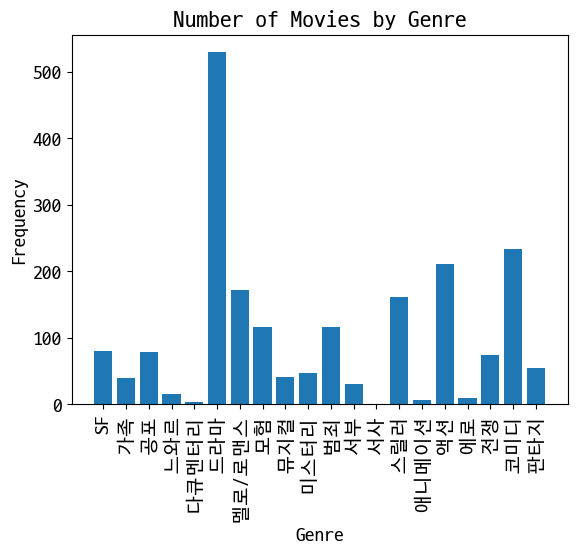

In [7]:
genre_counts = genres_df.groupby('genre').size()

plt.title('Number of Movies by Genre')
plt.bar(genre_counts.index, genre_counts.values)
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

     genre      rate
0       SF  9.053674
1       가족  8.976904
2       공포  8.834317
3      느와르  8.965353
4    다큐멘터리  8.000000
5      드라마  8.965973
6   멜로/로맨스  9.007665
7       모험  8.958822
8      뮤지컬  9.233288
9     미스터리  8.690435
10      범죄  9.013579
11      서부  8.947997
12      서사  9.209619
13     스릴러  8.976111
14   애니메이션  7.760434
15      액션  8.911821
16      에로  5.564103
17      전쟁  8.715259
18     코미디  8.954238
19     판타지  9.034153


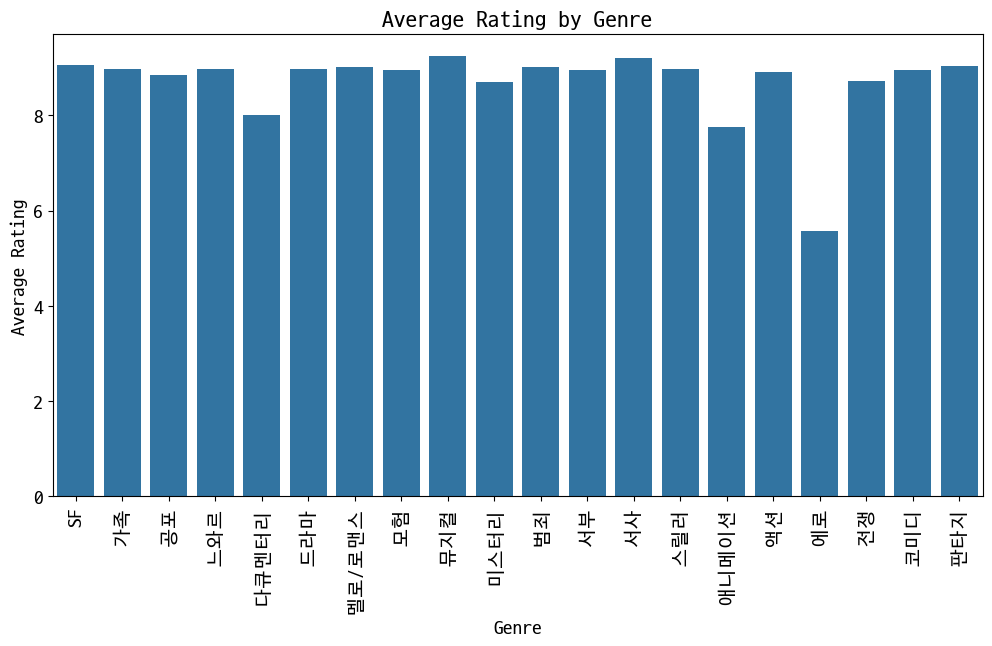

In [8]:
# rates_df와 genres_df 병합
merged_df = pd.merge(rates_df, genres_df, on='movie')

# 장르별 평균 평점 계산
genre_avg_rating = merged_df.groupby('genre')['rate'].mean().reset_index()

print(genre_avg_rating)
plt.figure(figsize=(12, 6))
sns.barplot(x='genre', y='rate', data=genre_avg_rating)
plt.title('Average Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()